# Example of dependent random variables, but with 0 covaraince
[🎞️ Steve Brunton: Covariance and Correlation in Probability](https://youtu.be/QKPdk57y7Ck?si=s17c0p3d59l0RCvu&t=731)

### 1. Define the variables

- **Random variable $X$:** uniform on $\{-1, 0, 1\}$  
  $$
  \mathbb{P}(X = -1) = \mathbb{P}(X = 0) = \mathbb{P}(X = 1) = \tfrac{1}{3}
  $$

- **Random variable $Y$:** defined as
  $$
  Y = X^2
  $$
  So:
  - If $X = -1$, then $Y = 1$
  - If $X = 0$, then $Y = 0$
  - If $X = 1$, then $Y = 1$

So $Y$ takes values in $\{0, 1\}$, and it’s clearly **determined by** $X$, so $X$ and $Y$ are **dependent**.

---

### 2. Compute the expectations

#### Expectation of $X$

$$
\mathbb{E}[X] = (-1)\cdot\tfrac{1}{3} + 0\cdot\tfrac{1}{3} + 1\cdot\tfrac{1}{3}
= -\tfrac{1}{3} + 0 + \tfrac{1}{3} = 0
$$

#### Expectation of $Y$

We know $Y = X^2$, so:

- When $X = -1$, $Y = 1$
- When $X = 0$, $Y = 0$
- When $X = 1$, $Y = 1$

Thus:
$$
\mathbb{P}(Y = 1) = \mathbb{P}(X = -1 \text{ or } X = 1) = \tfrac{1}{3} + \tfrac{1}{3} = \tfrac{2}{3}
$$
$$
\mathbb{P}(Y = 0) = \mathbb{P}(X = 0) = \tfrac{1}{3}
$$

So:
$$
\mathbb{E}[Y] = 1\cdot\tfrac{2}{3} + 0\cdot\tfrac{1}{3} = \tfrac{2}{3}
$$

---

### 3. Compute $\mathbb{E}[XY]$

We look at all possible values of $X$:

- If $X = -1$, then $Y = 1$, so $XY = -1$
- If $X = 0$, then $Y = 0$, so $XY = 0$
- If $X = 1$, then $Y = 1$, so $XY = 1$

Each with probability $\tfrac{1}{3}$:

$$
\mathbb{E}[XY] = (-1)\cdot\tfrac{1}{3} + 0\cdot\tfrac{1}{3} + 1\cdot\tfrac{1}{3}
= -\tfrac{1}{3} + 0 + \tfrac{1}{3} = 0
$$

---

### 4. Compute the covariance

Using the shortcut formula:
$$
\operatorname{Cov}(X, Y) = \mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y]
$$

We already have:
- $\mathbb{E}[XY] = 0$
- $\mathbb{E}[X] = 0$
- $\mathbb{E}[Y] = \tfrac{2}{3}$

So:
$$
\operatorname{Cov}(X, Y) = 0 - (0)\cdot\left(\tfrac{2}{3}\right) = 0
$$

So **covariance is zero**, even though $Y$ is literally a function of $X$.

---

### 5. Why this is such a good example

- **Dependence:** knowing $X$ tells you exactly what $Y$ is. For example, if you’re told $X = 0$, then $Y$ must be $0$; if you’re told $X = \pm 1$, then $Y$ must be $1$. That’s strong dependence.
- **Zero covariance:** covariance only measures **linear** association. Here, the relationship is **nonlinear**: $Y = X^2$. The “positive” and “negative” contributions to the linear term cancel out symmetrically, giving covariance $0$.

So this example drives home the point:

> Covariance $= 0$ ⇒ no *linear* relationship,  
> but it does **not** ⇒ independence.

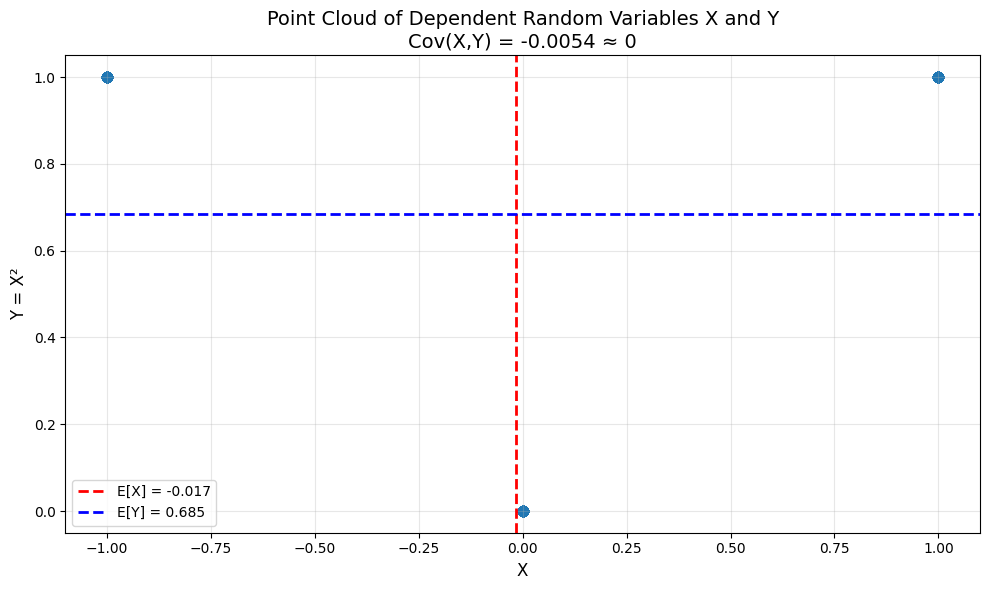

Sample statistics (n=1000):
E[X] = -0.0170
E[Y] = 0.6850
Cov(X,Y) = -0.0054


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate samples for X (uniform on {-1, 0, 1})
n_samples = 1000
X = np.random.choice([-1, 0, 1], size=n_samples, p=[1/3, 1/3, 1/3])

# Y is defined as X^2
Y = X**2

# Calculate covariance
cov_XY = np.cov(X, Y)[0, 1]
mean_X = np.mean(X)
mean_Y = np.mean(Y)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the point cloud
ax.scatter(X, Y, alpha=0.5, s=50)

# Add lines showing the means
ax.axvline(mean_X, color='red', linestyle='--', linewidth=2, label=f'E[X] = {mean_X:.3f}')
ax.axhline(mean_Y, color='blue', linestyle='--', linewidth=2, label=f'E[Y] = {mean_Y:.3f}')

# Add title and labels
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y = X²', fontsize=12)
ax.set_title(f'Point Cloud of Dependent Random Variables X and Y\nCov(X,Y) = {cov_XY:.4f} ≈ 0', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()

print(f"Sample statistics (n={n_samples}):")
print(f"E[X] = {mean_X:.4f}")
print(f"E[Y] = {mean_Y:.4f}")
print(f"Cov(X,Y) = {cov_XY:.4f}")